# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
# Create two new dataframes
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

In [3]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  9

In [32]:
#Code Used:
north_df["Rep ID"].nunique()


9

#### EDA Question 1B:  How many reps are in the South branch?  11

In [5]:
#Code Used:
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
#Code Used:
avg_busy_minutes = north_df['Busy Minutes'].mean()
avg_not_ready_minutes = north_df['Not Ready Minutes'].mean()
avg_incoming_wait_time = north_df['Incoming Wait Time'].mean()
avg_during_call_wait_time = north_df['During Call Wait Time'].mean()

print("North branch average busy minutes:", avg_busy_minutes)
print("North branch average not ready minutes:", avg_not_ready_minutes)
print("North branch average incoming wait time:", avg_incoming_wait_time)
print("North branch average during call wait time:", avg_during_call_wait_time)

North branch average busy minutes: 9.987755102040817
North branch average not ready minutes: 1.9142857142857144
North branch average incoming wait time: 3.048780487804878
North branch average during call wait time: 2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [23]:
#Code Used:
south_avg_busy_minutes = south_df['Busy Minutes'].mean()
south_avg_not_ready = south_df['Not Ready Minutes'].mean()
south_avg_incoming_wait = south_df['Incoming Wait Time'].mean()
south_avg_during_call_wait = south_df['During Call Wait Time'].mean()

print("South branch average busy minutes:", south_avg_busy_minutes)
print("South branch average not ready minutes", south_avg_not_ready)
print("South branch average incoming wait time", south_avg_incoming_wait)
print("South branch average during call wait time",south_avg_during_call_wait)

South branch average busy minutes: 10.054140127388536
South branch average not ready minutes 1.910828025477707
South branch average incoming wait time 3.0
South branch average during call wait time 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [29]:
# Code Used:
df = pd.concat([north_df, south_df])
calls_by_time_block = df.groupby('Time Block')['Calls'].count()
print(calls_by_time_block)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 10
> - Not Ready Minutes = 2 
> - Incoming Wait Time = 3
> - During Call Wait Time = 3
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10
> - Not Ready Minutes = 2
> - Incoming Wait Time = 3
> - During Call Wait Time = 3
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There could be missing data in order to check you would check for null values. Since there are so many null values in the coulmn it could be for outgoing call or the data was inputted incorrectly.  

In [11]:
null_counts = north_df.isnull().sum()

print(null_counts)

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64


In [12]:
null_counts = south_df.isnull().sum()

print(null_counts)

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


In [13]:
north_df.dropna()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,8,3,5.0,2,1
78,78,North,Product Support,4:00 PM,Incoming,A,Cam,NO,0,0,11,2,5.0,2,1
79,79,North,Complaint,10:00 AM,Incoming,A,Joe,NO,0,0,10,2,5.0,2,1
80,80,North,Complaint,12:00 PM,Incoming,B,Lilly,NO,0,0,11,2,5.0,2,1


In [14]:
south_df.dropna()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,South,Complaint,1:00 PM,Incoming,D,Randy,NO,0,0,10,2,5.0,4,1
122,122,South,Complaint,2:00 PM,Incoming,C,Alice,NO,0,0,11,3,5.0,3,1
123,123,South,Complaint,3:00 PM,Incoming,D,Kate,NO,0,0,10,2,5.0,3,1
124,124,South,Complaint,4:00 PM,Incoming,C,Sandy,NO,0,0,9,3,5.0,3,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values fo a sale. Why and how did you rectify the issue? 
##### Record your answer by double clicking here:r
> Your Answer: You would rectify it to make sure that all the data is a consistent value. The only thing I see when running the code is an extra space to correct that I used code below. 

In [15]:
#Code Used
# Add Additional Cells as needed.
north_df["Sale"].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [16]:
north_df["Sale"].replace(["YES "], "YES", inplace=True)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I don't see any duplicate datasets 

In [17]:
#Code Used
north_df.drop_duplicates(inplace=True)
# Add Additional Cells as needed.

In [18]:
south_df.drop_duplicates(inplace=True)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The unncessary data in the datasets would be the sale, calls and the unnamed coulmn. I got rid of these by drop the coulmns. 

In [19]:
#Code Used
# Add Additional Cells as needed.

In [25]:
north_df.drop(["Unnamed: 0", "Sale", "Calls"], axis=1)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,0,0,10,2,NaN,3
241,North,Product Support,5:00 PM,Outgoing,A,Joe,0,0,8,3,NaN,2
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,0,0,12,1,NaN,2
243,North,Product Support,5:00 PM,Outgoing,A,Cam,0,0,11,2,NaN,2


In [26]:
south_df.drop(["Unnamed: 0", "Sale", "Calls"], axis=1)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,South,Sales Support,10:00 AM,Incoming,D,Kate,0,0,9,1,1.0,2
1,South,Sales Support,10:00 AM,Incoming,C,Eric,0,0,8,2,1.0,4
2,South,Sales Support,10:00 AM,Incoming,C,Susan,0,0,10,2,1.0,4
3,South,Sales Support,10:00 AM,Incoming,C,Alice,0,0,12,1,1.0,3
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,0,0,8,3,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,0,0,10,3,NaN,4
310,South,Product Support,5:00 PM,Outgoing,C,Susan,0,0,12,3,NaN,4
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,0,9,3,NaN,4
312,South,Product Support,5:00 PM,Outgoing,C,Eric,0,0,10,1,NaN,2


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35


In [282]:
# Create dataframe for the entire company named df
df = pd.concat([south_df, north_df])
print(df)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  South    Sales Support   10:00 AM             Incoming     D   
1             1  South    Sales Support   10:00 AM             Incoming     C   
2             2  South    Sales Support   10:00 AM             Incoming     C   
3             3  South    Sales Support   10:00 AM             Incoming     C   
4             4  South    Sales Support   12:00 PM             Incoming     C   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product Support    5:00 PM             Outgoing     B   

     Rep ID Sale  Lost Call

In [328]:
# drop duplicates
null_counts = df.isnull().sum()

In [329]:
# dropped null values 
df.dropna()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,8,3,5.0,2,1
78,78,North,Product Support,4:00 PM,Incoming,A,Cam,NO,0,0,11,2,5.0,2,1
79,79,North,Complaint,10:00 AM,Incoming,A,Joe,NO,0,0,10,2,5.0,2,1
80,80,North,Complaint,12:00 PM,Incoming,B,Lilly,NO,0,0,11,2,5.0,2,1


In [330]:
# Group by Rep ID/sum the resulting structure. Sort by calls to determine the rep in each branch has the highest number of calls.¶
north_call = north_df.groupby("Rep ID").sum()["Calls"]
north_call = north_call.sort_values(ascending=False)

south_call = south_df.groupby("Rep ID").sum()["Calls"]
south_call = south_call.sort_values(ascending=False)

print("North Branch:\n", north_call)
print("\nSouth Branch:\n", south_call)

North Branch:
 Rep ID
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Calls, dtype: int64

South Branch:
 Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Calls, dtype: int64


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? Yes South branch and company wide

In [331]:
# Calculate call abandonment rates for each branch
north_abandoned_rate = north_df[north_df["Abandoned"] == 1]["Abandoned"].count() / north_df["Abandoned"].count()
south_abandoned_rate = south_df[south_df["Abandoned"] == 1]["Abandoned"].count() / south_df["Abandoned"].count()

# Calculate call abandonment rate for the entire company
company_abandoned_rate = (north_df[north_df["Abandoned"] == 1]["Abandoned"].count() + south_df[south_df["Abandoned"] == 1]["Abandoned"].count()) / (north_df["Abandoned"].count() + south_df["Abandoned"].count())

# Print results
print("Average Call Abandonment Rates:")
print(f"North Branch = {north_abandoned_rate:.2%}")
print(f"South Branch = {south_abandoned_rate:.2%}")
print(f"Company Wide = {company_abandoned_rate:.2%}")

Average Call Abandonment Rates:
North Branch = 2.86%
South Branch = 1.27%
Company Wide = 1.97%


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
North Branch = 40.24%, # of calls = 33
South Branch = 38.1%, # of calls = 48
Company Wide = 39.17%, # of calls = 81

In [361]:
# Code Used

# filter for incoming calls with wait time less than or equal to 2 seconds
incoming_calls = df[df['Incoming or Outgoing'] == 'Incoming']
answered_calls = incoming_calls[incoming_calls['Incoming Wait Time'] <= 2]

# calculate total incoming calls and answered calls for each branch and the entire company
total_calls = incoming_calls.groupby('Branch')['Calls'].sum()
answered_calls = answered_calls.groupby('Branch')['Calls'].sum()

# service level as percentage of answered calls out of total incoming calls for each branch and the entire company
service_level = (answered_calls / total_calls) * 100

print("Service Level:")
print("North Branch = {}%, # of calls = {}".format(round(service_level['North'], 2), (answered_calls['North'])))
print("South Branch = {}%, # of calls = {}".format(round(service_level['South'], 2), (answered_calls['South'])))
print("Company Wide = {}%, # of calls = {}".format(round(service_level.mean(), 2), (answered_calls.sum())))


# Add Additional Cells as needed.


Service Level:
North Branch = 40.24%, # of calls = 33
South Branch = 38.1%, # of calls = 48
Company Wide = 39.17%, # of calls = 81


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02


In [36]:
# Code Used 
# Average speed of answer for North branch
north_incoming_wait_time = north_df[north_df['Incoming or Outgoing'] == 'Incoming']['Incoming Wait Time'].sum()
north_incoming_calls = north_df[north_df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum()
north_avg_speed_of_answer = round(north_incoming_wait_time / north_incoming_calls, 2)

# Average speed of answer for South branch
south_incoming_wait_time = south_df[south_df['Incoming or Outgoing'] == 'Incoming']['Incoming Wait Time'].sum()
south_incoming_calls = south_df[south_df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum()
south_avg_speed_of_answer = round(south_incoming_wait_time / south_incoming_calls, 2)

# Average speed of answer for the entire company
combined_incoming_wait_time = combined_df[combined_df['Incoming or Outgoing'] == 'Incoming']['Incoming Wait Time'].sum()
combined_incoming_calls = combined_df[combined_df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum()
company_avg_speed_of_answer = round(combined_incoming_wait_time / combined_incoming_calls, 2)

print(f"North Branch in seconds = {north_avg_speed_of_answer}")
print(f"South Branch in seconds = {south_avg_speed_of_answer}")
print(f"Company Wide in seconds = {company_avg_speed_of_answer}")


North Branch in seconds = 3.05
South Branch in seconds = 3.0
Company Wide in seconds = 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose bar chart because because it makes it easier to see which queue is higher or lower abondoment rates compared to others. 

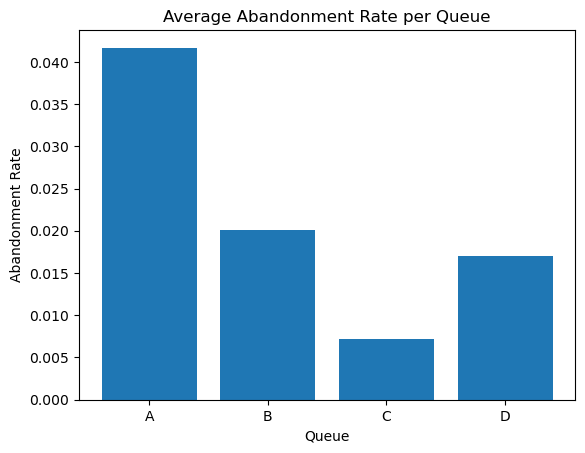

In [362]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

import matplotlib.pyplot as plt

queue_names = list(abandonment_rates.keys())
queue_values = list(abandonment_rates.values())

# bar chart
plt.bar(queue_names, queue_values)

# Add title and axis labels
plt.title("Average Abandonment Rate per Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")


plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: chose a bar chart because it will show side by side comaparion of each rep for the average speed of answered bars and service level percentage.

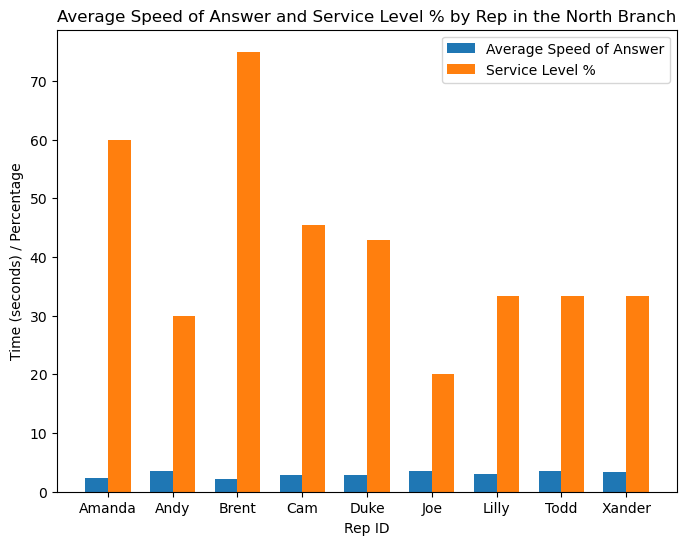

In [359]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
#merge both tables 
north_stats = pd.merge(north_plt, service_level, on="Rep ID")
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Set the x-axis labels as the rep IDs
labels = north_stats["Rep ID"]

# Set the x-axis positions for each group of bars
x = np.arange(len(labels))

# Set the width of each bar
width = 0.35

# Plot the average speed of answer bars
ax.bar(x - width/2, north_stats["Incoming Wait Time"], width, label="Average Speed of Answer")

# Plot the service level percentage bars
ax.bar(x + width/2, north_stats["Service Level %"], width, label="Service Level %")

# Add the x-axis labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Rep ID")
ax.set_ylabel("Time (seconds) / Percentage")
ax.set_title("Average Speed of Answer and Service Level % by Rep in the North Branch")
ax.legend()

plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: chose a stacked bar because it is easy to compare the breakdown of incoming and outgoing calls and it's able to show it for each type of call purpose. 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


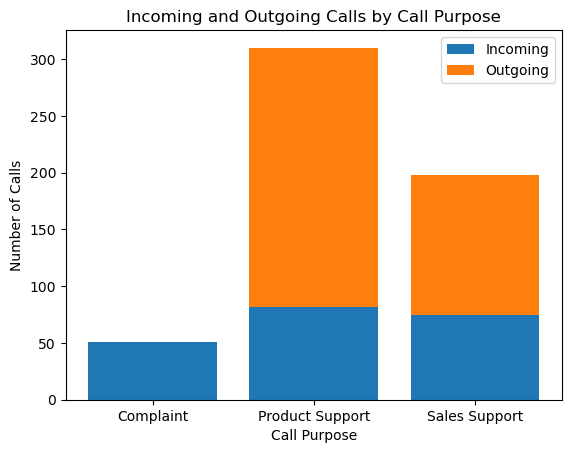

In [363]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
import matplotlib.pyplot as plt

# Define 
complaint_incoming = complaints.get("Incoming", 0)
complaint_outgoing = complaints.get("Outgoing", 0)
product_support_incoming = product_support.get("Incoming", 0)
product_support_outgoing = product_support.get("Outgoing", 0)
sales_support_incoming = sales_support.get("Incoming", 0)
sales_support_outgoing = sales_support.get("Outgoing", 0)

incoming_calls = [complaint_incoming, product_support_incoming, sales_support_incoming]
outgoing_calls = [complaint_outgoing, product_support_outgoing, sales_support_outgoing]
call_purpose = ["Complaint", "Product Support", "Sales Support"]

# stacked bar chart
plt.bar(call_purpose, incoming_calls, label='Incoming')
plt.bar(call_purpose, outgoing_calls, bottom=incoming_calls, label='Outgoing')

# chart labels and legend
plt.xlabel('Call Purpose')
plt.ylabel('Number of Calls')
plt.title('Incoming and Outgoing Calls by Call Purpose')
plt.legend()

plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South branch appeared to be operating more efficiently because they had a lower average abandonment rate, which meant customers were more than likely willing to stay on hold and wait to speak to someone. South Branch service level percentage was higher and they had lower average speed of answer. Overall seems like their overall level of customer satification was better. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The North Branch would benefit from more help, it can decreased their wait times so customer are more likely to stay on hold if at all and maybe increase their service level percentage and decrease the average speed of answer. Which overall can imporive their level of customer service. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Customer demographics maybe and the types of calls that were being made could have been helpful. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

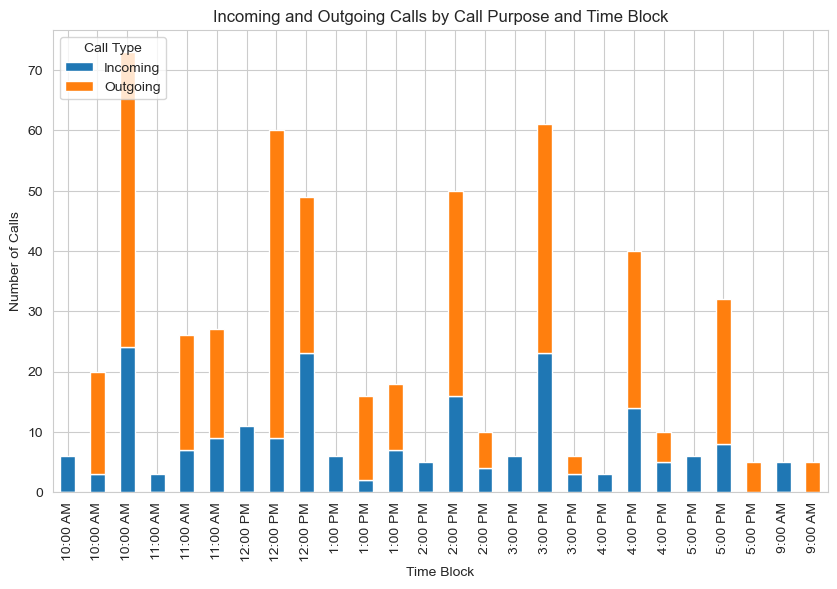

In [365]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant columns
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Group by Time Block, Call Purpose, and Incoming or Outgoing
call_counts = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"]).sum().reset_index()

# make Incoming and Outgoing calls separate columns
call_counts = call_counts.pivot(index=["Time Block", "Call Purpose"], columns="Incoming or Outgoing", values="Calls").reset_index()

#  stacked bar chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
call_counts.plot(kind="bar", x="Time Block", y=["Incoming", "Outgoing"], stacked=True, ax=ax)
ax.set_xlabel("Time Block")
ax.set_ylabel("Number of Calls")
ax.set_title("Incoming and Outgoing Calls by Call Purpose and Time Block")
plt.legend(title="Call Type", loc="upper left")

plt.show()
